In [3]:
import pandas as pd

In [5]:
cuaca = pd.read_excel("BMKG.xlsx", index_col="Tanggal")
cuaca

,WindSpeed,Humidity,Ray,TempAvg
Tanggal,,,,
2018-01-01,2.0,78.0,6.4,23.5
2018-01-02,2.0,80.0,6.9,23.1
2018-01-03,1.0,84.0,3.8,23.6
2018-01-04,1.0,88.0,3.2,22.9
2018-01-05,2.0,81.0,3.0,23.5
...,...,...,...,...
2021-12-27,1.0,80.0,5.8,24.2
2021-12-28,1.0,78.0,5.6,23.7
2021-12-29,2.0,80.0,6.0,24.2


In [6]:
cuaca.apply(pd.isnull).sum()

WindSpeed    13
Humidity     14
Ray          15
TempAvg      14
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer
numerical_features = cuaca.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy='mean')
cuaca[numerical_features] = imputer.fit_transform(cuaca[numerical_features])

In [8]:
cuaca.isna().sum()

WindSpeed    0
Humidity     0
Ray          0
TempAvg      0
dtype: int64

In [9]:
cuaca.dtypes

WindSpeed    float64
Humidity     float64
Ray          float64
TempAvg      float64
dtype: object

In [10]:
cuaca.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Tanggal', length=1460, freq=None)

In [11]:
cuaca.index = pd.to_datetime(cuaca.index, format="%d-%m-%Y")

In [12]:
cuaca.apply(lambda x: (x==9999).sum())

WindSpeed    0
Humidity     0
Ray          0
TempAvg      0
dtype: int64

<Axes: xlabel='Tanggal'>

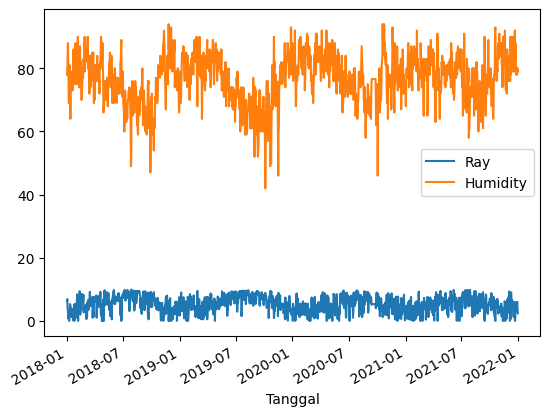

In [14]:
cuaca[["Ray", "Humidity"]].plot()

In [15]:
cuaca["target"] = cuaca.shift(-1)["TempAvg"]
cuaca

,WindSpeed,Humidity,Ray,TempAvg,target
Tanggal,,,,,
2018-01-01,2.0,78.0,6.4,23.5,23.1
2018-01-02,2.0,80.0,6.9,23.1,23.6
2018-01-03,1.0,84.0,3.8,23.6,22.9
2018-01-04,1.0,88.0,3.2,22.9,23.5
2018-01-05,2.0,81.0,3.0,23.5,24.0
...,...,...,...,...,...
2021-12-27,1.0,80.0,5.8,24.2,23.7
2021-12-28,1.0,78.0,5.6,23.7,24.2
2021-12-29,2.0,80.0,6.0,24.2,23.9


In [16]:
cuaca = cuaca.iloc[:-1,:].copy()
cuaca

,WindSpeed,Humidity,Ray,TempAvg,target
Tanggal,,,,,
2018-01-01,2.0,78.0,6.4,23.5,23.1
2018-01-02,2.0,80.0,6.9,23.1,23.6
2018-01-03,1.0,84.0,3.8,23.6,22.9
2018-01-04,1.0,88.0,3.2,22.9,23.5
2018-01-05,2.0,81.0,3.0,23.5,24.0
...,...,...,...,...,...
2021-12-26,1.0,78.0,3.1,24.3,24.2
2021-12-27,1.0,80.0,5.8,24.2,23.7
2021-12-28,1.0,78.0,5.6,23.7,24.2


In [17]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

In [18]:
predict = ['TempAvg', 'Humidity', 'Ray']  # Update with actual columns from test_data
train_data = cuaca.loc[:"2020-01-01"]
test_data = cuaca.loc["2020-01-01":]
reg.fit(train_data[predict], train_data["target"])
prediction = reg.predict(test_data[predict])

In [19]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_data["target"], prediction)

np.float64(0.5374808212433168)

In [30]:
combined = pd.concat([test_data["target"], pd.Series(prediction, index=test_data.index)], axis=1)
combined.columns = ["actual", "prediction"]
combined

,actual,prediction
Tanggal,,
2020-01-01,23.6,22.870469
2020-01-02,24.8,23.691220
2020-01-03,24.4,24.406316
2020-01-04,24.1,24.164975
2020-01-05,24.4,23.989522
...,...,...
2021-12-26,24.2,24.100599
2021-12-27,23.7,24.042864
2021-12-28,24.2,23.709581


<Axes: xlabel='Tanggal'>

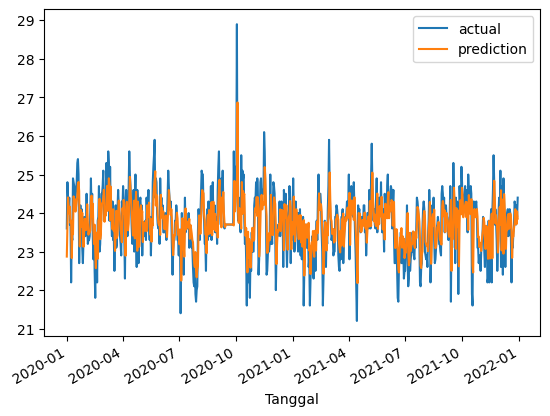

In [31]:
combined.plot()

In [22]:
reg.coef_

array([ 0.64376206,  0.00589172, -0.00190458])

In [23]:
from sklearn.metrics import accuracy_score
def create_predictions(predict, cuaca, reg):
  train_data = cuaca.loc[:"2020-01-01"]
  test_data = cuaca.loc["2020-01-01":]
  reg.fit(train_data[predict], train_data["target"])
  prediction = reg.predict(test_data[predict])
  error = mean_absolute_error(test_data["target"], prediction)
  combined = pd.concat([test_data["target"], pd.Series(prediction, index=test_data.index)], axis=1)
  combined.columns = ["actual", "prediction"]

  threshold = 1  # Define a threshold for considering a prediction correct
  predicted_labels = [1 if abs(p - a) <= threshold else 0 for p, a in zip(prediction, test_data["target"])]
  actual_labels = [1] * len(test_data["target"])  # All actual values are considered 'correct'
  accuracy = accuracy_score(actual_labels, predicted_labels)
  return error, combined, accuracy

In [24]:
error, combined, accuracy = create_predictions(predict, cuaca, reg)
print("Mean Absolute Error:", error)
print("Accuracy:", accuracy)

Mean Absolute Error: 0.5374808212433168
Accuracy: 0.869684499314129


In [25]:
combined["diff"] = (combined["actual"] - combined["prediction"]).abs()
combined.sort_values("diff", ascending=False).head()

,actual,prediction,diff
Tanggal,,,
2020-10-02,28.9,24.463658,4.436342
2021-09-13,21.7,24.339870,2.639870
2020-10-03,24.3,26.870322,2.570322
2021-10-17,21.9,24.244754,2.344754
2021-01-18,21.6,23.818944,2.218944
